In [26]:
import networkx as net
import matplotlib.pyplot as plot
import pandas as pd

In [27]:
e=net.read_pajek("egypt_retweets.net")

In [28]:
len(e.nodes(data=True))

25178

In [29]:
len(list(net.connected_component_subgraphs(e)))

3122

In [30]:
x=[len(c) for c in net.connected_component_subgraphs(e)]


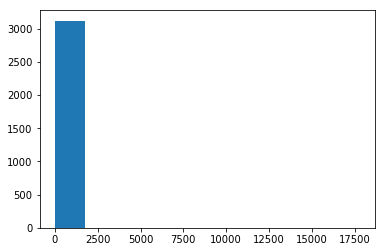

In [31]:
plot.hist(x)
plot.show()

In [32]:
[len(c) for c in net.connected_component_subgraphs(e) if len(c) > 10]

[17762, 64, 16, 13, 11, 11, 14, 16]

In [33]:
def trim_edges(g, weight=1):
    g2=net.Graph()
    for f, to, edata in g.edges(data=True):
        if edata['weight'] > weight:
            g2.add_edge(f,to,edata)
    return g2

In [34]:
e.edges(data=True)

[('partager1973', 'PJCrowley', {'weight': 3.0}),
 ('RaoufRamahy', 'esraa_ali', {'weight': 1.0}),
 ('annaberlin1983', 'arwasm', {'weight': 1.0}),
 ('alexander_drake', 'Colvinius', {'weight': 2.0}),
 ('TwiddleEastNews', 'alaa', {'weight': 1.0}),
 ('TwiddleEastNews', 'ptypk', {'weight': 1.0}),
 ('TwiddleEastNews', 'sharifkouddous', {'weight': 2.0}),
 ('TwiddleEastNews', 'realrissa', {'weight': 1.0}),
 ('TwiddleEastNews', '_Sheri_Lynn_', {'weight': 1.0}),
 ('TwiddleEastNews', 'HerQ10', {'weight': 1.0}),
 ('TwiddleEastNews', 'stand4haq', {'weight': 2.0}),
 ('blackgothchick', 'blackballonline', {'weight': 3.0}),
 ('blackgothchick', 'blackgothchick', {'weight': 1.0}),
 ('MartinaArapovic', 'monaeltahawy', {'weight': 2.0}),
 ('DocsDaisyWoman', 'ArabRevolution', {'weight': 1.0}),
 ('sue_elise', 'BannedBlood', {'weight': 2.0}),
 ('Why0h562', 'Sandmonkey', {'weight': 9.0}),
 ('Why0h562', 'FreeLibyanman', {'weight': 2.0}),
 ('Why0h562', 'ashrafkhalil', {'weight': 1.0}),
 ('Why0h562', 'Tharwacolamus

In [35]:
def island_method(g, iterations=5):
    weights= [edata['weight'] for f,to,edata in g.edges(data=True)]
    mn=int(min(weights))
    mx=int(max(weights))
    print(mx)
    #compute the size of the step, so we get a reasonable step in iterations
    step=int((mx-mn)/iterations)
    return [[threshold, trim_edges(g, threshold)] for threshold in range(mn,mx,step)]

In [36]:
cc=list(net.connected_component_subgraphs(e))[0]
islands=island_method(cc)
for i in islands:
 # print the threshold level, size of the graph, and number of connected components
    print(i[0], len(i[1]), len(list(net.connected_component_subgraphs(i[1]))))

306
1 12360 314
62 27 11
123 8 3
184 5 2
245 5 2


In [37]:
list(net.connected_component_subgraphs(e))[0]

In [38]:
range(1,20,2)

range(1, 20, 2)

In [39]:
list(net.ego_graph(cc,'justinbieber'))

['justinbieber',
 'kokiJesseJB',
 'jtvanderb',
 'CitrusDoBieber',
 'Gainsvoourg',
 'beccahorner1211',
 'trabolsia',
 'Nivo98',
 'Bieberluuver4',
 'justinbiebaer',
 'mattei_sandra',
 'IBiebeira',
 'TheTeenagersFR',
 'CaseyDre']

In [40]:
list(net.Graph(net.ego_graph(cc,'justinbieber', radius=2)))

['justinbieber',
 'kokiJesseJB',
 'jtvanderb',
 'CitrusDoBieber',
 'Gainsvoourg',
 'beccahorner1211',
 'trabolsia',
 'Nivo98',
 'Bieberluuver4',
 'justinbiebaer',
 'mattei_sandra',
 'IBiebeira',
 'TheTeenagersFR',
 'CaseyDre',
 'todayshow',
 'travisbarker',
 'DJMeddi',
 'MarElhad',
 'ChangeInLibya',
 'OmarAlmu5tar',
 'ShababLibya',
 'LianaMariaa']

In [41]:
list(cc.subgraph('Ghonim'))

['Ghonim']

In [42]:
cc.neighbors('justinbieber')

['kokiJesseJB',
 'jtvanderb',
 'CitrusDoBieber',
 'Gainsvoourg',
 'beccahorner1211',
 'trabolsia',
 'Nivo98',
 'Bieberluuver4',
 'justinbiebaer',
 'mattei_sandra',
 'IBiebeira',
 'TheTeenagersFR',
 'CaseyDre']

In [43]:
ter =pd.read_csv("https://raw.githubusercontent.com/maksim2042/SNABook/master/chapter4/9_11_edgelist.txt",header=None)

In [44]:
g=net.Graph()
for index,line in ter.iterrows():
    #print(line[0])
    g.add_edge(line[0],line[1],weight=line[2],conf=line[3])

In [45]:
g.nodes()

['Hani Hanjour',
 'Majed Moqed',
 'Nawaf Alhazmi',
 'Khalid Al-Mihdhar',
 'Lotfi Raissi',
 'Bandar Alhazmi',
 'Rayed Mohammed Abdullah',
 'Salem Alhazmi',
 'Hamza Alghamdi',
 'Ahmed Alnami',
 'Saeed Alghamdi',
 'Abdussattar Shaikh',
 'Osama Awadallah',
 'Mohamed Atta',
 'Abdul Aziz Al-Omari',
 'Marwan Al-Shehhi',
 'Ziad Jarrah',
 'Said Bahaji',
 'Ramzi Bin al-Shibh',
 'Zakariya Essabar',
 'Essid Sami Ben Khemais',
 'Waleed Alshehri',
 'Wail Alshehri',
 'Satam Suqami',
 'Fayez Ahmed',
 'Mohand Alshehri',
 'Mustafa Ahmed al-Hisawi',
 'Ahmed Alghamdi',
 'Ahmed Al Haznawi',
 'Zacarias Moussaoui',
 'Djamal Beghal',
 'Jerome Courtaillier',
 'David Courtaillier',
 'Ahmed Ressam',
 'Kamel Daoudi',
 'Tarek Maaroufi',
 'Faisal Al Salmi',
 'Mohamed Abdi',
 'Mamoun Darkazanli',
 'Ahmed Khalil Ibrahim Samir Al-Ani',
 'Agus Budiman',
 'Mounir El Motassadeq ',
 'Abdelghani Mzoudi',
 'Imad Eddin Barakat Yarkas',
 'Nabil al-Marabh',
 'Raed Hijazi',
 'Abu Qatada',
 'Mamduh Mahmud Salim',
 'Mohammed Belf

In [46]:
#first, let's make sure that all nodes in the graph have the 'flight' attribute
for n in g.nodes_iter(): g.node[n]['flight']='None'
attrb=pd.read_csv("https://raw.githubusercontent.com/maksim2042/SNABook/master/chapter4/9_11_edgelist.txt",header=None)
for index,line in attrb.iterrows():
    g.node[line[0]]['flight']=line[1]

In [47]:
g.nodes(data=True)

[('Hani Hanjour', {'flight': 'Ziad Jarrah'}),
 ('Majed Moqed', {'flight': 'Khalid Al-Mihdhar'}),
 ('Nawaf Alhazmi', {'flight': 'Mohamed Atta'}),
 ('Khalid Al-Mihdhar', {'flight': 'Salem Alhazmi'}),
 ('Lotfi Raissi', {'flight': 'Rayed Mohammed Abdullah'}),
 ('Bandar Alhazmi', {'flight': 'Rayed Mohammed Abdullah'}),
 ('Rayed Mohammed Abdullah', {'flight': 'Bandar Alhazmi'}),
 ('Salem Alhazmi', {'flight': 'Ziad Jarrah'}),
 ('Hamza Alghamdi', {'flight': 'Ahmed Alghamdi'}),
 ('Ahmed Alnami', {'flight': 'Saeed Alghamdi'}),
 ('Saeed Alghamdi', {'flight': 'Raed Hijazi'}),
 ('Abdussattar Shaikh', {'flight': 'Osama Awadallah'}),
 ('Osama Awadallah', {'flight': 'Abdussattar Shaikh'}),
 ('Mohamed Atta', {'flight': 'Agus Budiman'}),
 ('Abdul Aziz Al-Omari', {'flight': 'Ahmed Alghamdi'}),
 ('Marwan Al-Shehhi', {'flight': 'Salem Alhazmi'}),
 ('Ziad Jarrah', {'flight': 'Salem Alhazmi'}),
 ('Said Bahaji', {'flight': 'Mounir El Motassadeq '}),
 ('Ramzi Bin al-Shibh', {'flight': 'Agus Budiman'}),
 ('Zaka

C:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
C:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in

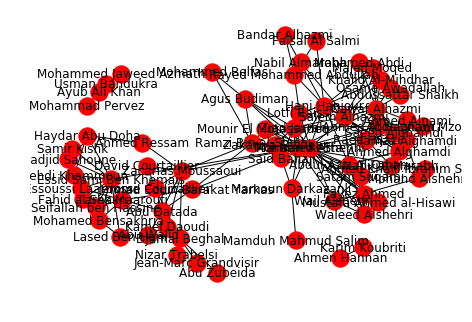

In [48]:
net.draw(g,with_labels=True)
plot.show()

In [49]:
components=net.connected_component_subgraphs(g)
list(list(components)[1])

['Ayub Ali Khan',
 'Mohammed Jaweed Azmath',
 'Usman Bandukra',
 'Mohammad Pervez']

In [50]:
cc = list(components)[0]

IndexError: list index out of range

In [ ]:
import networkx as net
import matplotlib.pyplot as plot
from collections import defaultdict

def plot_multimode(m,layout=net.spring_layout, type_string='type', with_labels=True, filename_prefix='',output_type='pdf'):

    ## create a default color order and an empty color-map
    colors=['r','g','b','c','m','y','k']
    colormap={}
    d=net.degree(m)  #we use degree for sizing nodes
    pos=layout(m)  #compute layout 
    
    #Now we need to find groups of nodes that need to be colored differently
    nodesets=defaultdict(list)
    for n in m.nodes():
        try:
            t=m.node[n][type_string]
        except KeyError:
            ##this happens if a node doesn't have a type_string -- give it a None value
            t='None'
        nodesets[t].append(n)
        
    ## Draw each group of nodes separately, using its own color settings
    print("drawing nodes...")
    i=0
    for key in nodesets.keys():
        ns=[d[n]*100 for n in nodesets[key]]
        net.draw_networkx_nodes(m,pos,nodelist=nodesets[key], node_size=ns, node_color=colors[i], alpha=0.6)
        colormap[key]=colors[i]
        i+=1
        if i==len(colors): 
            i=0  ### wrap around the colormap if we run out of colors
    print(colormap)  
    
    ## Draw edges using a default drawing mechanism
    print("drawing edges...")
    net.draw_networkx_edges(m,pos,width=0.5,alpha=0.5)  
    
    print("drawing labels...")
    if with_labels: 
        net.draw_networkx_labels(m,pos,font_size=12)
    plot.axis('off')
    if filename_prefix is not '':
        plot.savefig(filename_prefix+'.'+output_type)

In [51]:
import multimode as mm

ModuleNotFoundError: No module named 'multimode'